In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import plotly.express as px
import country_converter as coco

In [2]:
data = pd.read_csv('../../Data/FuentesOriginales/USAR/List of Countries by GDP Sector Composition.csv')
data.head()

,Index Number,Rank,Country/Economy,GDP (millions of $),Agriculture GDP,Unnamed: 5,Unnamed: 6,Industry,Unnamed: 8,Unnamed: 9,Services,Unnamed: 11,Unnamed: 12,Year GDP,Year Sector
0,NaN,NaN,NaN,NaN,GDP,Rank,% of GDP,GDP,Rank,% of GDP,GDP,Rank,% of GDP,NaN,NaN
1,0.0,1,United States,19360000,174240,3,0.9,3659040,2,18.9,15526720,1,80.2,2017,2017
2,1.0,2,China,11940000,991020,1,8.3,4716300,1,39.5,6232680,2,52.2,2017,2017
3,2.0,3,Japan,4884000,48840,13,1,1450548,3,29.7,3384612,3,69.3,2017,2017
4,3.0,4,Germany,3652000,21912,31,0.6,1099252,4,30.1,2530836,4,69.3,2016,2017


PREPAR DATA

1. RENOMBRAR LAS COLUMNAS MANUALMENTE

In [3]:
column_names = [
    "Index Number",
    "Rank",
    "Country/Economy",
    "GDP (millions of $)",
    "Agriculture GDP",
    "Agriculture Rank",
    "Agriculture % of GDP",
    "Industry GDP",
    "Industry Rank",
    "Industry % of GDP",
    "Services GDP",
    "Services Rank",
    "Services % of GDP",
    "Year GDP",
    "Year Sector",
]

data.columns = column_names

In [4]:
data = data.drop(index=0)

In [5]:
data.head()

,Index Number,Rank,Country/Economy,GDP (millions of $),Agriculture GDP,Agriculture Rank,Agriculture % of GDP,Industry GDP,Industry Rank,Industry % of GDP,Services GDP,Services Rank,Services % of GDP,Year GDP,Year Sector
1,0.0,1,United States,19360000,174240,3,0.9,3659040,2,18.9,15526720,1,80.2,2017,2017
2,1.0,2,China,11940000,991020,1,8.3,4716300,1,39.5,6232680,2,52.2,2017,2017
3,2.0,3,Japan,4884000,48840,13,1,1450548,3,29.7,3384612,3,69.3,2017,2017
4,3.0,4,Germany,3652000,21912,31,0.6,1099252,4,30.1,2530836,4,69.3,2016,2017
5,4.0,5,France,2575000,51500,11,2,517575,7,20.1,2005925,6,77.9,2017,2017


In [6]:
data.shape

(230, 15)

PREPARAMOS EL LAYOUT PATA EL SUBPLOT

In [7]:
columns = len(data.columns)
rows = (columns + 1) // 2

CREAMOS LA FIGURA Y DETERMINAMOS EL TAMAÑO

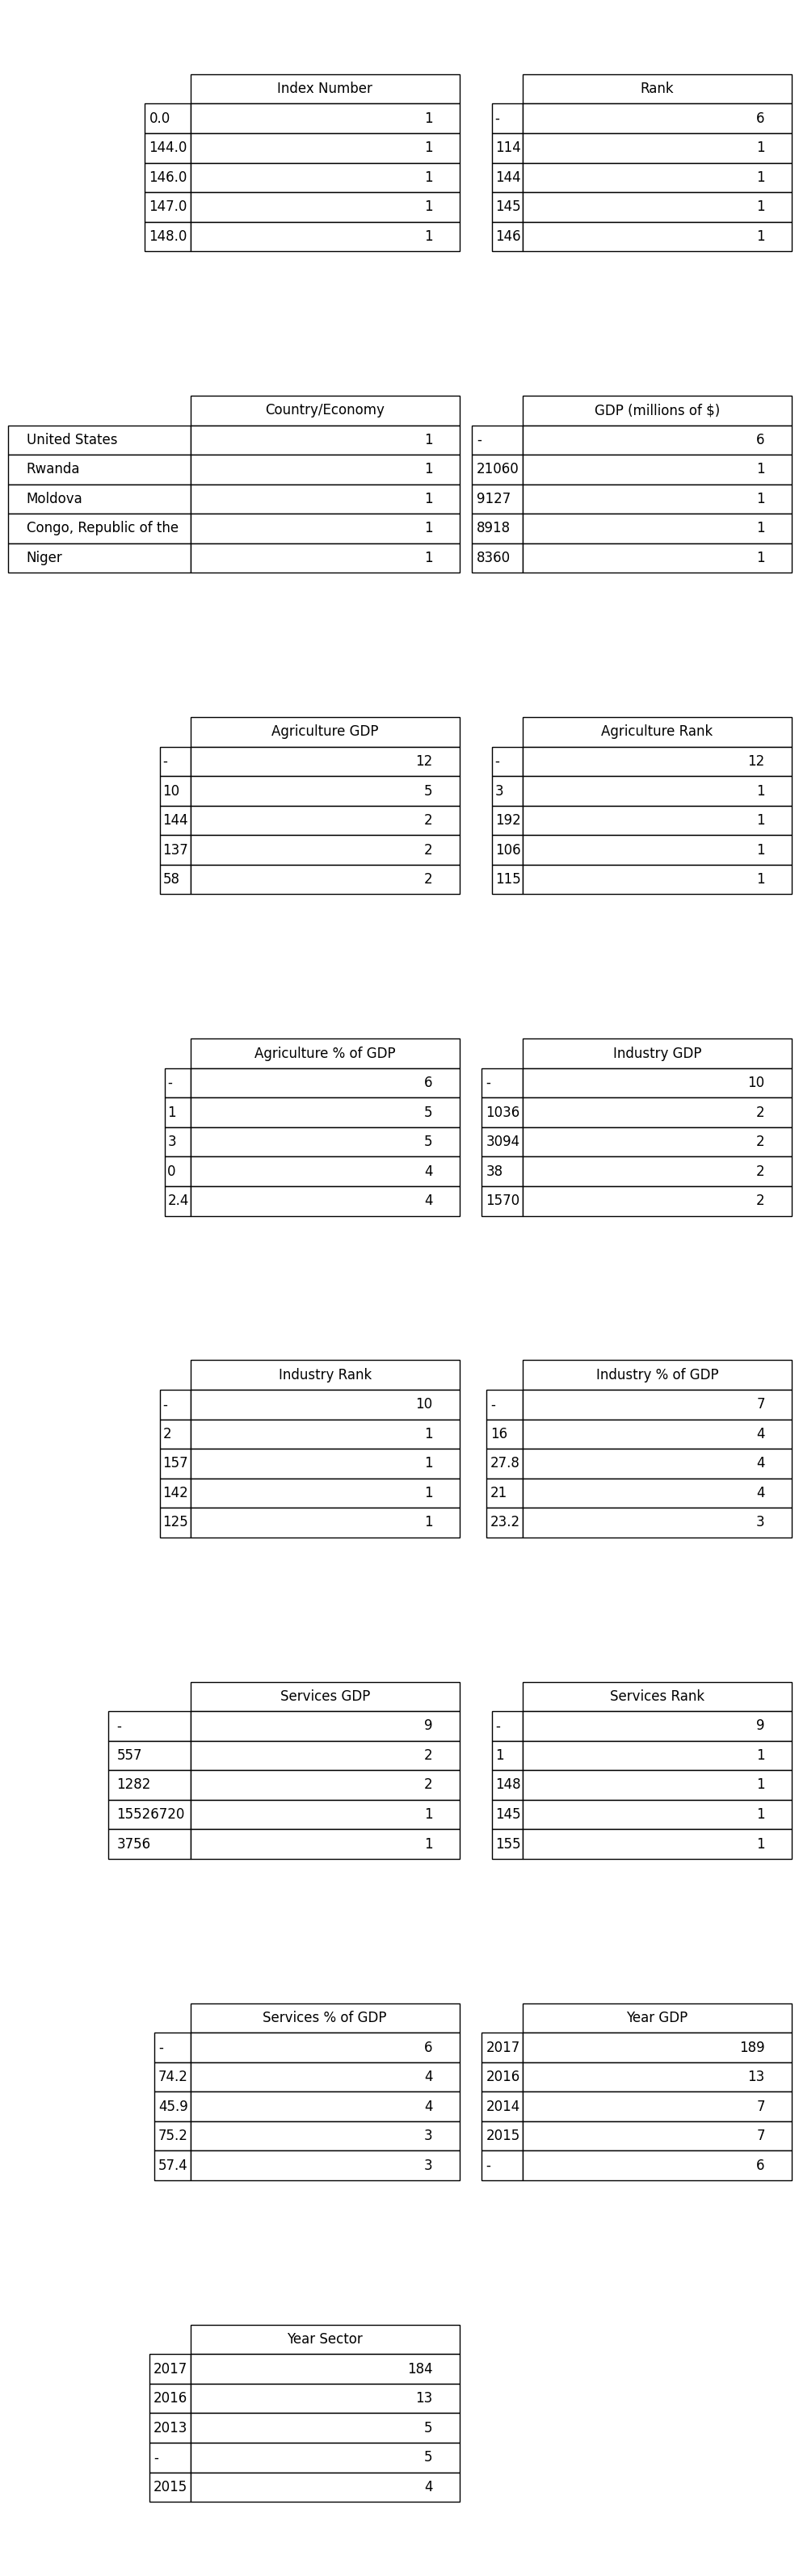

<Figure size 640x480 with 0 Axes>

In [13]:
fig, axes = plt.subplots(rows, 2, figsize=(10, rows * 4))
axes = axes.flatten()

for i, column in enumerate(data.columns):
    value_counts = data[column].value_counts().head(5)
    value_counts_table = axes[i].table(cellText=value_counts.to_frame().values,
            rowLabels=value_counts.index,
            colLabels=[column],
            loc="center")
    value_counts_table.auto_set_font_size(False)
    value_counts_table.set_fontsize(12)
    value_counts_table.scale(1, 1.5)
    axes[i].axis("off")
for j in range(i+1, len(axes)):
    axes[j].axis("off")


plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()

In [14]:
data.dtypes

Index Number            float64
Rank                     object
Country/Economy          object
GDP (millions of $)      object
Agriculture GDP          object
Agriculture Rank         object
Agriculture % of GDP     object
Industry GDP             object
Industry Rank            object
Industry % of GDP        object
Services GDP             object
Services Rank            object
Services % of GDP        object
Year GDP                 object
Year Sector              object
dtype: object

CONVERTIMOS EL DATA TYPE A NUMERICO

In [16]:
numeric_columns = [
    "GDP (millions of $)",
    "Agriculture GDP",
    "Agriculture Rank",
    "Agriculture % of GDP",
    "Industry GDP",
    "Industry Rank",
    "Industry % of GDP",
    "Services GDP",
    "Services Rank",
    "Services % of GDP",
    "Year GDP",
    "Year Sector",
]

for column in numeric_columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

CREAMOS LOS DATAFRAMES

In [17]:
data["Year GDP"] = data["Year GDP"].astype("category")
data["Year Sector"] = data["Year Sector"].astype("category")

In [18]:
data.dtypes

Index Number             float64
Rank                      object
Country/Economy           object
GDP (millions of $)      float64
Agriculture GDP          float64
Agriculture Rank         float64
Agriculture % of GDP     float64
Industry GDP             float64
Industry Rank            float64
Industry % of GDP        float64
Services GDP             float64
Services Rank            float64
Services % of GDP        float64
Year GDP                category
Year Sector             category
dtype: object

TRATAMIENTO DE VALORES NULOS

In [19]:
data.isna().sum()

Index Number             0
Rank                     0
Country/Economy          0
GDP (millions of $)      6
Agriculture GDP         12
Agriculture Rank        12
Agriculture % of GDP     6
Industry GDP            10
Industry Rank           10
Industry % of GDP        7
Services GDP             9
Services Rank            9
Services % of GDP        6
Year GDP                 6
Year Sector              6
dtype: int64

In [20]:
data.describe()

,Index Number,GDP (millions of $),Agriculture GDP,Agriculture Rank,Agriculture % of GDP,Industry GDP,Industry Rank,Industry % of GDP,Services GDP,Services Rank,Services % of GDP
count,230.000000,2.240000e+02,218.000000,218.000000,224.000000,2.200000e+02,220.000000,223.000000,2.210000e+02,221.000000,224.000000
mean,114.500000,3.543662e+05,15820.288991,109.500000,11.297321,9.996509e+04,110.500000,26.232287,2.434012e+05,111.000000,62.244643
std,66.539462,1.603511e+06,74005.759231,63.075352,12.186433,4.270580e+05,63.652704,12.193557,1.183021e+06,63.941379,14.796023
min,0.000000,1.000000e+01,1.000000,1.000000,0.000000,2.000000e+00,1.000000,0.000000,5.000000e+00,1.000000,27.000000
25%,57.250000,4.758250e+03,267.500000,55.250000,2.300000,8.995000e+02,55.750000,17.650000,2.630000e+03,56.000000,51.500000
50%,114.500000,2.168000e+04,2130.500000,109.500000,6.850000,5.951500e+03,110.500000,25.500000,1.177300e+04,111.000000,61.050000
75%,171.750000,1.587250e+05,7960.750000,163.750000,17.425000,5.277500e+04,165.250000,33.450000,8.897900e+04,166.000000,73.425000
max,229.000000,1.936000e+07,991020.000000,218.000000,60.700000,4.716300e+06,220.000000,63.800000,1.552672e+07,221.000000,100.000000


In [21]:
data["Continent"] = data["Country/Economy"].apply(lambda x: coco.convert(names=x, to="Continent", not_found="Other"))

Virgin Islands not found in regex


EXPLORAMOS LA DATA

LISTA DE LOS 20 PAISES

In [29]:
g20_countries = [
    "Argentina", "Australia", "Brazil", "Canada", "China", "France", "Germany", "India", "Indonesia", "Italy",
    "Japan", "Mexico", "Russia", "Saudi Arabia", "South Africa", "Korea, South", "Turkey", "United Kingdom",
    "United States"
]

g20_data = data[data["Country/Economy"].isin(g20_countries)]

g20_data.head(35)

,Index Number,Rank,Country/Economy,GDP (millions of $),Agriculture GDP,Agriculture Rank,Agriculture % of GDP,Industry GDP,Industry Rank,Industry % of GDP,Services GDP,Services Rank,Services % of GDP,Year GDP,Year Sector,Continent
1,0.0,1,United States,19360000.0,174240.0,3.0,0.9,3659040.0,2.0,18.9,15526720.0,1.0,80.2,2017.0,2017.0,America
2,1.0,2,China,11940000.0,991020.0,1.0,8.3,4716300.0,1.0,39.5,6232680.0,2.0,52.2,2017.0,2017.0,Asia
3,2.0,3,Japan,4884000.0,48840.0,13.0,1.0,1450548.0,3.0,29.7,3384612.0,3.0,69.3,2017.0,2017.0,Asia
4,3.0,4,Germany,3652000.0,21912.0,31.0,0.6,1099252.0,4.0,30.1,2530836.0,4.0,69.3,2016.0,2017.0,Europe
5,4.0,5,France,2575000.0,51500.0,11.0,2.0,517575.0,7.0,20.1,2005925.0,6.0,77.9,2017.0,2017.0,Europe
6,5.0,6,United Kingdom,2565000.0,15390.0,36.0,0.6,487350.0,8.0,19.0,2062260.0,5.0,80.4,2017.0,2017.0,Europe
7,6.0,7,India,2439000.0,375606.0,2.0,15.4,560970.0,6.0,23.0,1499985.0,8.0,61.5,2017.0,2016.0,Asia
8,7.0,8,Brazil,2081000.0,129022.0,4.0,6.2,437010.0,12.0,21.0,1514968.0,7.0,72.8,2017.0,2017.0,America
9,8.0,9,Italy,1921000.0,40341.0,17.0,2.1,461040.0,10.0,24.0,1419619.0,9.0,73.9,2017.0,2017.0,Europe
10,9.0,10,Canada,1640000.0,27880.0,25.0,1.7,460840.0,11.0,28.1,1151280.0,10.0,70.2,2017.0,2017.0,America


In [27]:
gdp_chart = px.bar(g20_data, x="Country/Economy", y="GDP (millions of $)", title="G20 Countries' GDP (millions of $)")
gdp_chart.show()

# Reshape the data for sector compositions
g20_data_melted = g20_data.melt(id_vars="Country/Economy", value_vars=["Agriculture GDP", "Industry GDP", "Services GDP"], 
                                var_name="Sector", value_name="GDP")

# Create a bar chart for sector compositions
sector_chart = px.bar(g20_data_melted, x="Country/Economy", y="GDP", color="Sector",
                title="G20 Countries' Sector Compositions")
sector_chart.show()

Con base en el análisis de las economías del G20 y sus composiciones sectoriales, podemos resumir lo siguiente:

En la mayoría de los países del G20, el sector de los servicios es el que más contribuye a sus economías. Estados Unidos lidera en el sector servicios, seguido de China y Japón. Esta tendencia destaca la creciente importancia del sector de servicios en las economías modernas, que puede atribuirse al crecimiento de la tecnología, los servicios financieros, la atención médica y otras industrias orientadas a los servicios.

China es el país líder en el G20 tanto en el sector industrial como en el agrícola. En el sector industrial, China es seguida por Estados Unidos, mientras que en agricultura, India ocupa el segundo lugar. El dominio de China en estos sectores se puede atribuir a su gran población, vasta superficie terrestre y rápido desarrollo económico en las últimas décadas. El país ha invertido mucho en la producción industrial y agrícola, lo que lo convierte en una potencia mundial en estos sectores.

Agrupamos los datos por continente y se calculo la suma del PIB y las composiciones sectoriales

In [30]:

continent_economy = data.groupby('Continent').agg({
    'GDP (millions of $)': 'sum',
    'Agriculture GDP': 'sum',
    'Industry GDP': 'sum',
    'Services GDP': 'sum'
}).reset_index()

# Reshape the data for sector compositions
continent_economy_melted = continent_economy.melt(id_vars='Continent', value_vars=['Agriculture GDP', 'Industry GDP', 'Services GDP'], 
                            var_name='Sector', value_name='GDP')

# Create a bar chart for continent economies
continent_chart = px.bar(continent_economy_melted, x='Continent', y='GDP', color='Sector', title="Continents' Economy by Sector")
continent_chart.show()